In [1]:
#import necessary modules
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
%matplotlib inline

In [2]:
import random
file = 'all_accelerometer_data_pids_13.csv'
p = 0.001
random.seed(42)
df_rand = pd.read_csv(file, skiprows=lambda i: i>0 and random.random() > p, low_memory=False)
df_rand.head()

,time,pid,x,y,z
0,1493733887972,SA0297,0.0125,-0.0108,-0.0028
1,1493733900165,SA0297,0.0012,-0.0038,-0.0005
2,1493733997784,SA0297,-0.0007,-0.0020,-0.0034
3,1493734015555,SA0297,-0.1128,-0.0495,-0.1873
4,1493734070052,SA0297,-0.0259,0.0878,-0.0204


In [95]:
#create alternate file load
df = pd.read_csv(file)
df.head()

,time,pid,x,y,z
0,0,JB3156,0.0000,0.0000,0.0000
1,0,CC6740,0.0000,0.0000,0.0000
2,1493733882409,SA0297,0.0758,0.0273,-0.0102
3,1493733882455,SA0297,-0.0359,0.0794,0.0037
4,1493733882500,SA0297,-0.2427,-0.0861,-0.0163


In [96]:
df = df.iloc[2:].copy()
df.reset_index(inplace=True, drop=True)
df['datetime'] = pd.to_datetime(df['time'], unit='ms')
df.head()

,time,pid,x,y,z,datetime
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953


In [97]:
try:
    df = pd.read_csv('df_accel_clean.csv')
    
except:
    df.to_csv('df_accel_clean.csv', index=False)
    
df.head()

,time,pid,x,y,z,datetime
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953


In [12]:
df_list = []
for pid in set(df.pid.values):
    df_slice = df[df['pid'] == pid]
    #take the first 10% of values
    df_slice = df_slice[:int(df_slice.shape[0]*.1)]
    df_list.append(df_slice)
    
df_10_percent = pd.concat(df_list)

In [13]:
df_10_percent.head()

,time,pid,x,y,z
154025,1493736949591,MJ8002,0.0025,0.0043,-0.0027
154029,1493736949616,MJ8002,-0.0003,-0.0013,-0.0051
154033,1493736949641,MJ8002,0.0022,0.0014,-0.0027
154037,1493736949665,MJ8002,0.0006,-0.0010,-0.0047
154041,1493736949691,MJ8002,0.0009,-0.0005,-0.0055


In [14]:
df_10_percent.describe(include='all')

,time,pid,x,y,z
count,1.405751e+06,1405751,1.405751e+06,1.405751e+06,1.405751e+06
unique,NaN,13,NaN,NaN,NaN
top,NaN,CC6740,NaN,NaN,NaN
freq,NaN,237469,NaN,NaN,NaN
mean,1.493743e+12,NaN,1.369884e-02,-1.427898e-02,1.950659e-02
std,5.782103e+06,NaN,7.487850e-01,9.145659e-01,1.249051e+00
min,1.493734e+12,NaN,-2.848955e+01,-3.059311e+01,-4.236954e+01
25%,1.493739e+12,NaN,-1.150000e-02,-1.034605e-02,-8.500000e-03
50%,1.493742e+12,NaN,1.000000e-04,2.000000e-04,5.400000e-03
75%,1.493745e+12,NaN,1.510000e-02,1.620407e-02,5.930000e-02


In [15]:
clean_tac = 'clean_tac/{}_clean_TAC.csv'
df_list = []

for pid in set(df_rand['pid'].values):
    df = pd.read_csv(clean_tac.format(pid))
    df['pid'] = list(np.tile(pid, len(df)))
    #df['label'] = np.where(df['TAC_Reading'] >= 0.08, 'Drunk', 'Sober')
    df['datetime'] = pd.to_datetime(df['timestamp'], unit='s')
    df_list.append(df)
    
df_tacs = pd.concat(df_list)

In [16]:
df_tacs = df_tacs[df_tacs.pid != 'BK7610']

In [5]:
df_rand['datetime'] = pd.to_datetime(df_rand.time, unit='ms')
df_rand.head()

,time,pid,x,y,z,datetime
0,1493733887972,SA0297,0.0125,-0.0108,-0.0028,2017-05-02 14:04:47.972
1,1493733900165,SA0297,0.0012,-0.0038,-0.0005,2017-05-02 14:05:00.165
2,1493733997784,SA0297,-0.0007,-0.0020,-0.0034,2017-05-02 14:06:37.784
3,1493734015555,SA0297,-0.1128,-0.0495,-0.1873,2017-05-02 14:06:55.555
4,1493734070052,SA0297,-0.0259,0.0878,-0.0204,2017-05-02 14:07:50.052


In [17]:
df_10_percent['datetime'] = pd.to_datetime(df_10_percent.time, unit='ms')
df_10_percent.head()

,time,pid,x,y,z,datetime
154025,1493736949591,MJ8002,0.0025,0.0043,-0.0027,2017-05-02 14:55:49.591
154029,1493736949616,MJ8002,-0.0003,-0.0013,-0.0051,2017-05-02 14:55:49.616
154033,1493736949641,MJ8002,0.0022,0.0014,-0.0027,2017-05-02 14:55:49.641
154037,1493736949665,MJ8002,0.0006,-0.0010,-0.0047,2017-05-02 14:55:49.665
154041,1493736949691,MJ8002,0.0009,-0.0005,-0.0055,2017-05-02 14:55:49.691


In [18]:
def variance_calculator(df1, df2, pid, delta=timedelta(minutes=30)):
    df1 = df1[df1.pid == pid].copy()
    df2 = df2[df2.pid == pid].copy()
        
    start = max(df1['datetime'].min(), df2['datetime'].min()) + delta
    end = df1['datetime'].max()
    window = start
        
    X = []
    t = []
    y = []
        
    while window <= end:
    
        mask = (df2['datetime'] >= window - delta) & (df2['datetime'] < window)
        mask2 = (df1['datetime'] >= window) & (df1['datetime'] < window + delta)
        X.append(df2[mask][['x', 'y', 'z']].std())
        t.append(window)
        y.append(df1[mask2]['TAC_Reading'].mean())
   
        window += delta
        
    df_x = pd.DataFrame(X, index=t)
    df_x = df_x.rename(columns={'x':'x_variance', 'y':'y_variance', 'z':'z_variance'})
    df_x["datetime"] = t
    df_x['TAC_Reading'] = y
    df_x = df_x.dropna()
    df_x['pid'] = pid
    df_x['drunk'] = np.where(df_x['TAC_Reading'] >= 0.08, 1, 0)
    df_x['var'] = np.sqrt(df_x['x_variance']**2 + df_x['y_variance']**2 + df_x['z_variance']**2)
    return df_x

In [86]:
def raw_calculator(df_tacs, df_acc, pid, delta=timedelta(minutes=30)):
    df1 = df_tacs[df_tacs.pid == pid].copy()
    df2 = df_acc[df_acc.pid == pid].copy()
        
    start = max(df1['datetime'].min(), df2['datetime'].min()) + delta
    end = df1['datetime'].max()
    window = start
        
    X = []
    t = []
    y = []
        
    for i, tac in df1.iterrows():
        print(tac)
        accel_predeceding_tac = df2[df2['datetime'] < tac['datetime']]
        accel_datetime = accel_predeceding_tac['datetime'].max()
        #pull out row at accel_datetime
        print(df2[df2['datetime'] == accel_datetime])
        #print(df2[df2['datetime'] < tac['datetime']])
        print(i)
#         if len(accel_predeceding_tac) > 0: 
#             break
        mask = (df2['datetime'] >= window - delta) & (df2['datetime'] < window)
        mask2 = (df1['datetime'] >= window) & (df1['datetime'] < window + delta)
#         X.append(df2[mask][['x', 'y', 'z']].std())
        X.append(df2[df2['datetime'] == accel_datetime][['x', 'y', 'z']])
        t.append(window)
        y.append(df1[mask2]['TAC_Reading'].mean())
   
        window += delta
        
    df_x = pd.DataFrame(X, index=t)
#     df_x = df_x.rename(columns={'x':'x_variance', 'y':'y_variance', 'z':'z_variance'})
    df_x["datetime"] = t
    df_x['TAC_Reading'] = y
    df_x = df_x.dropna()
    df_x['pid'] = pid
    df_x['drunk'] = np.where(df_x['TAC_Reading'] >= 0.08, 1, 0)
#     df_x['var'] = np.sqrt(df_x['x_variance']**2 + df_x['y_variance']**2 + df_x['z_variance']**2)
#     return df_x
    return df_x

In [104]:
def new_variance_calculator(df_tacs, df_acc, pid, delta=timedelta(minutes=30)):
    df1 = df_tacs[df_tacs.pid == pid].copy()
    df2 = df_acc[df_acc.pid == pid].copy()
    
    start = max(df1['datetime'].min() + delta, df2['datetime'].min()) + delta
    end = df1['datetime'].max()
    window = start
    
    X = []
    t = []
    y = []
    
    #rework earlier calculator so that it reverses accel/tac direction
    while window <= end:
    
        mask = (df1['datetime'] >= window - delta) & (df1['datetime'] < window)
        mask2 = (df2['datetime'] >= window) & (df2['datetime'] < window + delta)
        X.append(df2[mask2][['x', 'y', 'z']].std())
        t.append(window)
        y.append(df1[mask]['TAC_Reading'].mean())
   
        window += delta
        
    df_x = pd.DataFrame(X, index=t)
    df_x = df_x.rename(columns={'x':'x_variance', 'y':'y_variance', 'z':'z_variance'})
    df_x["datetime"] = t
    df_x['TAC_Reading'] = y
    df_x = df_x.dropna()
    df_x['pid'] = pid
    df_x['drunk'] = np.where(df_x['TAC_Reading'] >= 0.08, 1, 0)
    df_x['var'] = np.sqrt(df_x['x_variance']**2 + df_x['y_variance']**2 + df_x['z_variance']**2)
    return df_x

In [137]:
def triple_variance_calculator(df_tacs, df_acc, pid, delta1=timedelta(minutes=30), delta2=timedelta(minutes=10)):
    df1 = df_tacs[df_tacs.pid == pid].copy()
    df2 = df_acc[df_acc.pid == pid].copy()
    
    start = max(df1['datetime'].min() + delta1, df2['datetime'].min()) + delta1
    end = df1['datetime'].max()
    tac_window = start
    
    X = []
    t = []
    y = []
    
    while tac_window <= end:
    
        accel_window = tac_window
        mask1 = (df1['datetime'] >= tac_window - delta1) & (df1['datetime'] < tac_window)
        mask2 = (df2['datetime'] >= accel_window) & (df2['datetime'] < accel_window + delta2)
        
        X.append(df2[mask2][['x', 'y', 'z']].std())
        t.append(accel_window)
        accel_window += delta2
        
        X.append(df2[mask2][['x', 'y', 'z']].std())
        t.append(accel_window)
        accel_window += delta2
        
        X.append(df2[mask2][['x', 'y', 'z']].std())
        t.append(accel_window)
        accel_window += delta2
        
        y.append(df1[mask1]['TAC_Reading'].mean())
        tac_window += delta1
        
    df_x = pd.DataFrame(X, index=t)
    df_x = df_x.rename(columns={'x':'x_variance', 'y':'y_variance', 'z':'z_variance'})
    df_x["datetime"] = t
    df_x['TAC_Reading'] = np.repeat(y, 3)
    df_x = df_x.dropna()
    df_x['pid'] = pid
    df_x['drunk'] = np.where(df_x['TAC_Reading'] >= 0.08, 1, 0)
    df_x['var'] = np.sqrt(df_x['x_variance']**2 + df_x['y_variance']**2 + df_x['z_variance']**2)
    return df_x

In [140]:
df_check = triple_variance_calculator(df_tacs, df, 'SA0297')
df_check.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 17:04:42.409,0.038231,0.057885,0.064458,2017-05-02 17:04:42.409,0.111503,SA0297,1,0.094695
2017-05-02 17:14:42.409,0.038231,0.057885,0.064458,2017-05-02 17:14:42.409,0.111503,SA0297,1,0.094695
2017-05-02 17:24:42.409,0.038231,0.057885,0.064458,2017-05-02 17:24:42.409,0.111503,SA0297,1,0.094695
2017-05-02 17:34:42.409,0.092856,0.080349,0.075062,2017-05-02 17:34:42.409,0.160592,SA0297,1,0.143918
2017-05-02 17:44:42.409,0.092856,0.080349,0.075062,2017-05-02 17:44:42.409,0.160592,SA0297,1,0.143918


In [141]:
df_check.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,60.000000,60.000000,60.000000,60,60.000000,60,60.000000,60.000000
unique,NaN,NaN,NaN,60,NaN,1,NaN,NaN
top,NaN,NaN,NaN,2017-05-03 07:54:42.409000,NaN,SA0297,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,60,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 17:04:42.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 10:24:42.409000,NaN,NaN,NaN,NaN
mean,0.075822,0.070710,0.070459,NaN,0.062880,NaN,0.300000,0.125954
std,0.078270,0.066807,0.066854,NaN,0.058819,NaN,0.462125,0.122086
min,0.000932,0.000967,0.001036,NaN,-0.004768,NaN,0.000000,0.001734
25%,0.001075,0.001180,0.001184,NaN,0.009703,NaN,0.000000,0.001980


In [143]:
df_check_2 = new_variance_calculator(df_tacs, df, 'SA0297')
df_check_2.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 16:34:42.409,0.051347,0.263880,0.714789,2017-05-02 16:34:42.409,0.059263,SA0297,0,0.763670
2017-05-02 17:04:42.409,0.077773,0.089042,0.091982,2017-05-02 17:04:42.409,0.111503,SA0297,1,0.149793
2017-05-02 17:34:42.409,0.095521,0.084279,0.094867,2017-05-02 17:34:42.409,0.160592,SA0297,1,0.158830
2017-05-02 18:04:42.409,0.208198,0.154078,0.170855,2017-05-02 18:04:42.409,0.182644,SA0297,1,0.310286
2017-05-02 19:04:42.409,0.121042,0.113976,0.123664,2017-05-02 19:04:42.409,0.120321,SA0297,1,0.207206


In [144]:
df_check_2.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,22.000000,22.000000,22.000000,22,22.000000,22,22.000000,22.000000
unique,NaN,NaN,NaN,22,NaN,1,NaN,NaN
top,NaN,NaN,NaN,2017-05-02 16:34:42.409000,NaN,SA0297,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,22,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 16:34:42.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 10:04:42.409000,NaN,NaN,NaN,NaN
mean,0.090985,0.097786,0.114545,NaN,0.063530,NaN,0.318182,0.183356
std,0.102014,0.106706,0.158373,NaN,0.057056,NaN,0.476731,0.209976
min,0.000994,0.000970,0.001057,NaN,-0.004768,NaN,0.000000,0.001750
25%,0.001806,0.001966,0.001869,NaN,0.010372,NaN,0.000000,0.003120


In [98]:
df = pd.read_csv('df_accel_clean.csv')
df.head()

,time,pid,x,y,z,datetime
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953


In [101]:
df['datetime'].dtype

dtype('O')

In [102]:
df_tacs.dtypes

timestamp               int64
TAC_Reading           float64
pid                    object
datetime       datetime64[ns]
dtype: object

In [105]:
df = pd.read_csv('df_accel_clean.csv')
#datetime doesn't load
df['datetime'] = pd.to_datetime(df['time'], unit='ms')
df_new = new_variance_calculator(df_tacs, df, 'SA0297')
df_new.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 16:34:42.409,0.051347,0.263880,0.714789,2017-05-02 16:34:42.409,0.059263,SA0297,0,0.763670
2017-05-02 17:04:42.409,0.077773,0.089042,0.091982,2017-05-02 17:04:42.409,0.111503,SA0297,1,0.149793
2017-05-02 17:34:42.409,0.095521,0.084279,0.094867,2017-05-02 17:34:42.409,0.160592,SA0297,1,0.158830
2017-05-02 18:04:42.409,0.208198,0.154078,0.170855,2017-05-02 18:04:42.409,0.182644,SA0297,1,0.310286
2017-05-02 19:04:42.409,0.121042,0.113976,0.123664,2017-05-02 19:04:42.409,0.120321,SA0297,1,0.207206


In [106]:
df_new.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,22.000000,22.000000,22.000000,22,22.000000,22,22.000000,22.000000
unique,NaN,NaN,NaN,22,NaN,1,NaN,NaN
top,NaN,NaN,NaN,2017-05-02 16:34:42.409000,NaN,SA0297,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,22,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 16:34:42.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 10:04:42.409000,NaN,NaN,NaN,NaN
mean,0.090985,0.097786,0.114545,NaN,0.063530,NaN,0.318182,0.183356
std,0.102014,0.106706,0.158373,NaN,0.057056,NaN,0.476731,0.209976
min,0.000994,0.000970,0.001057,NaN,-0.004768,NaN,0.000000,0.001750
25%,0.001806,0.001966,0.001869,NaN,0.010372,NaN,0.000000,0.003120


In [87]:
raw_calculator(df_tacs, df_rand, 'SA0297')

timestamp               1493716723
TAC_Reading             -0.0102292
pid                         SA0297
datetime       2017-05-02 09:18:43
Name: 0, dtype: object
Empty DataFrame
Columns: [time, pid, x, y, z, datetime]
Index: []
0
timestamp               1493718546
TAC_Reading            -0.00251214
pid                         SA0297
datetime       2017-05-02 09:49:06
Name: 1, dtype: object
Empty DataFrame
Columns: [time, pid, x, y, z, datetime]
Index: []
1
timestamp               1493718863
TAC_Reading             0.00324904
pid                         SA0297
datetime       2017-05-02 09:54:23
Name: 2, dtype: object
Empty DataFrame
Columns: [time, pid, x, y, z, datetime]
Index: []
2
timestamp               1493719179
TAC_Reading             0.00540368
pid                         SA0297
datetime       2017-05-02 09:59:39
Name: 3, dtype: object
Empty DataFrame
Columns: [time, pid, x, y, z, datetime]
Index: []
3
timestamp               1493719495
TAC_Reading             0.00337719
pid   

               time     pid       x       y       z                datetime
7037  1493780794407  SA0297 -0.0149  0.0106  0.0293 2017-05-03 03:06:34.407
45
timestamp               1493786000
TAC_Reading               0.034904
pid                         SA0297
datetime       2017-05-03 04:33:20
Name: 46, dtype: object
               time     pid       x       y       z                datetime
7037  1493780794407  SA0297 -0.0149  0.0106  0.0293 2017-05-03 03:06:34.407
46
timestamp               1493787840
TAC_Reading              0.0322876
pid                         SA0297
datetime       2017-05-03 05:04:00
Name: 47, dtype: object
               time     pid       x       y       z                datetime
7037  1493780794407  SA0297 -0.0149  0.0106  0.0293 2017-05-03 03:06:34.407
47
timestamp               1493789681
TAC_Reading              0.0275913
pid                         SA0297
datetime       2017-05-03 05:34:41
Name: 48, dtype: object
               time     pid       x       y

,0,datetime,TAC_Reading,pid,drunk
2017-05-02 14:34:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 14:34:47.972,0.023972,SA0297,0
2017-05-02 15:04:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 15:04:47.972,0.016196,SA0297,0
2017-05-02 15:34:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 15:34:47.972,0.025131,SA0297,0
2017-05-02 16:04:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 16:04:47.972,0.059263,SA0297,0
2017-05-02 16:34:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 16:34:47.972,0.111503,SA0297,1
2017-05-02 17:04:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 17:04:47.972,0.160592,SA0297,1
2017-05-02 17:34:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 17:34:47.972,0.182644,SA0297,1
2017-05-02 18:04:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 18:04:47.972,0.166101,SA0297,1
2017-05-02 18:34:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 18:34:47.972,0.120321,SA0297,1
2017-05-02 19:04:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 19:04:47.972,0.071503,SA0297,0


In [88]:
df_x = raw_calculator(df_tacs, df_rand, 'SA0297')
df_x.head()

timestamp               1493716723
TAC_Reading             -0.0102292
pid                         SA0297
datetime       2017-05-02 09:18:43
Name: 0, dtype: object
Empty DataFrame
Columns: [time, pid, x, y, z, datetime]
Index: []
0
timestamp               1493718546
TAC_Reading            -0.00251214
pid                         SA0297
datetime       2017-05-02 09:49:06
Name: 1, dtype: object
Empty DataFrame
Columns: [time, pid, x, y, z, datetime]
Index: []
1
timestamp               1493718863
TAC_Reading             0.00324904
pid                         SA0297
datetime       2017-05-02 09:54:23
Name: 2, dtype: object
Empty DataFrame
Columns: [time, pid, x, y, z, datetime]
Index: []
2
timestamp               1493719179
TAC_Reading             0.00540368
pid                         SA0297
datetime       2017-05-02 09:59:39
Name: 3, dtype: object
Empty DataFrame
Columns: [time, pid, x, y, z, datetime]
Index: []
3
timestamp               1493719495
TAC_Reading             0.00337719
pid   

35
timestamp               1493767571
TAC_Reading              0.0651719
pid                         SA0297
datetime       2017-05-02 23:26:11
Name: 36, dtype: object
               time     pid       x       y       z                datetime
5851  1493767525844  SA0297  0.3378 -0.0837  0.1724 2017-05-02 23:25:25.844
36
timestamp               1493769417
TAC_Reading              0.0325272
pid                         SA0297
datetime       2017-05-02 23:56:57
Name: 37, dtype: object
               time     pid       x       y       z                datetime
6069  1493769394656  SA0297 -0.0001 -0.0009 -0.0054 2017-05-02 23:56:34.656
37
timestamp               1493771262
TAC_Reading              0.0275473
pid                         SA0297
datetime       2017-05-03 00:27:42
Name: 38, dtype: object
               time     pid       x       y       z                datetime
6092  1493769542569  SA0297  0.0085 -0.0021 -0.0029 2017-05-02 23:59:02.569
38
timestamp               1493773106
TAC_R

,0,datetime,TAC_Reading,pid,drunk
2017-05-02 14:34:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 14:34:47.972,0.023972,SA0297,0
2017-05-02 15:04:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 15:04:47.972,0.016196,SA0297,0
2017-05-02 15:34:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 15:34:47.972,0.025131,SA0297,0
2017-05-02 16:04:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 16:04:47.972,0.059263,SA0297,0
2017-05-02 16:34:47.972,"Empty DataFrame Columns: [x, y, z] Index: []",2017-05-02 16:34:47.972,0.111503,SA0297,1


In [19]:
def participant_compiler(df1, df2, delta=timedelta(minutes=30)):
    combined_df = []
    for pid in set(df1['pid'].values):
        new_df = variance_calculator(df1, df2, pid)
        combined_df.append(new_df)
    df = pd.concat(combined_df)    
    return df

In [107]:
def new_participant_compiler(df_tacs, df_accel):
    df_list = []
    for pid in set(df_tacs['pid'].values):
        new_df = new_variance_calculator(df_tacs, df_accel, pid)
        df_list.append(new_df)
    df = pd.concat(df_list)    
    return df

In [145]:
def triple_participant_compiler(df_tacs, df_accel):
    df_list = []
    for pid in set(df_tacs['pid'].values):
        new_df = triple_variance_calculator(df_tacs, df_accel, pid)
        df_list.append(new_df)
    df = pd.concat(df_list)    
    return df

In [108]:
df_new = new_participant_compiler(df_tacs, df)
df_new.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 16:25:49.591,0.013530,0.014721,0.012850,2017-05-02 16:25:49.591,0.009276,MJ8002,0,0.023767
2017-05-02 16:55:49.591,0.041927,0.041905,0.049638,2017-05-02 16:55:49.591,0.032789,MJ8002,0,0.077316
2017-05-02 17:25:49.591,0.071998,0.080731,0.077637,2017-05-02 17:25:49.591,0.066343,MJ8002,0,0.133149
2017-05-02 19:55:49.591,0.141160,0.125360,0.135781,2017-05-02 19:55:49.591,0.088189,MJ8002,1,0.232546
2017-05-02 20:25:49.591,0.138227,0.134158,0.135176,2017-05-02 20:25:49.591,0.065017,MJ8002,0,0.235324


In [109]:
df_new.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,202.000000,2.020000e+02,2.020000e+02,202,202.000000,202,202.000000,2.020000e+02
unique,NaN,NaN,NaN,202,NaN,12,NaN,NaN
top,NaN,NaN,NaN,2017-05-03 00:26:20.198000,NaN,CC6740,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,37,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 14:58:08.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 10:56:20.198000,NaN,NaN,NaN,NaN
mean,0.516984,3.320190e+06,3.320190e+06,NaN,0.070298,NaN,0.336634,4.695458e+06
std,0.936467,1.492600e+07,1.492600e+07,NaN,0.060530,NaN,0.473732,2.110855e+07
min,0.000505,4.638478e-04,7.141577e-04,NaN,-0.004768,NaN,0.000000,1.416220e-03
25%,0.026003,2.689726e-02,3.457123e-02,NaN,0.018268,NaN,0.000000,5.247847e-02


In [8]:
new_df = variance_calculator(df_tacs, df_rand, 'SA0297')
new_df.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 14:34:47.972,0.245853,0.237074,0.221837,2017-05-02 14:34:47.972,0.023972,SA0297,0,0.407258
2017-05-02 18:04:47.972,0.058179,0.045463,0.069879,2017-05-02 18:04:47.972,0.166101,SA0297,1,0.101660
2017-05-02 18:34:47.972,0.181735,0.144964,0.220303,2017-05-02 18:34:47.972,0.120321,SA0297,1,0.320274
2017-05-02 19:34:47.972,0.059842,0.154462,0.053741,2017-05-02 19:34:47.972,0.047758,SA0297,0,0.174148
2017-05-02 20:34:47.972,0.071190,0.076897,0.084351,2017-05-02 20:34:47.972,0.106077,SA0297,1,0.134522


In [9]:
combined_df = participant_compiler(df_tacs, df_rand)
combined_df.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 15:21:14.657,0.004719,0.004426,0.007705,2017-05-02 15:21:14.657,-0.010123,MC7070,0,0.010061
2017-05-02 17:51:14.657,0.007118,0.019134,0.010952,2017-05-02 17:51:14.657,0.144962,MC7070,1,0.023167
2017-05-02 18:21:14.657,0.018257,0.019098,0.008725,2017-05-02 18:21:14.657,0.183037,MC7070,1,0.027824
2017-05-02 20:21:14.657,0.111922,0.049201,0.110304,2017-05-02 20:21:14.657,0.144615,MC7070,1,0.164664
2017-05-02 20:51:14.657,0.117214,0.110298,0.114434,2017-05-02 20:51:14.657,0.133820,MC7070,1,0.197484


In [20]:
df_slice = participant_compiler(df_tacs, df_10_percent)
df_slice.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 15:25:49.591,0.098029,0.090310,0.105897,2017-05-02 15:25:49.591,-0.001359,MJ8002,0,0.170235
2017-05-02 16:55:49.591,0.013530,0.014721,0.012850,2017-05-02 16:55:49.591,0.066343,MJ8002,0,0.023767
2017-05-02 17:25:49.591,0.024971,0.024985,0.040393,2017-05-02 17:25:49.591,0.101030,MJ8002,1,0.053660
2017-05-02 16:26:20.198,1.725634,1.832800,1.257044,2017-05-02 16:26:20.198,0.055006,CC6740,0,2.813739
2017-05-02 16:56:20.198,0.032389,0.040562,0.040976,2017-05-02 16:56:20.198,0.060860,CC6740,0,0.066131


In [21]:
df_slice.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,42.000000,42.000000,42.000000,42,42.000000,42,42.000000,42.000000
unique,NaN,NaN,NaN,42,NaN,11,NaN,NaN
top,NaN,NaN,NaN,2017-05-02 17:33:24.780000,NaN,CC6740,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,7,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 14:34:42.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-02 23:05:09.881000,NaN,NaN,NaN,NaN
mean,0.378831,0.450821,0.497087,NaN,0.083836,NaN,0.428571,0.786646
std,0.614202,0.784510,0.993968,NaN,0.055151,NaN,0.500870,1.398249
min,0.013530,0.014721,0.012850,NaN,-0.010123,NaN,0.000000,0.023767
25%,0.071094,0.070897,0.085163,NaN,0.048164,NaN,0.000000,0.136661


In [22]:
df = pd.read_csv(file)
df = df.loc[2:]
df = df.reset_index(drop=True)
df['datetime'] = pd.to_datetime(df['time'], unit='ms')
df.head()

,time,pid,x,y,z,datetime
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953


In [25]:
df.describe(include='all')

,time,pid,x,y,z,datetime
count,1.405756e+07,14057565,1.405756e+07,1.405756e+07,1.405756e+07,14057565
unique,NaN,13,NaN,NaN,NaN,12907010
top,NaN,CC6740,NaN,NaN,NaN,2017-05-02 18:06:43.745000
freq,NaN,2374694,NaN,NaN,NaN,6
first,NaN,NaN,NaN,NaN,NaN,2017-05-02 14:04:42.409000
last,NaN,NaN,NaN,NaN,NaN,2017-05-03 16:34:08.294000
mean,1.493778e+12,NaN,-9.269850e-03,-7.168399e+06,7.168399e+06,NaN
std,2.616946e+07,NaN,9.540697e-01,3.528998e+07,3.528998e+07,NaN
min,1.493734e+12,NaN,-4.333507e+01,-1.809008e+08,-4.902300e+01,NaN
25%,1.493755e+12,NaN,-5.700000e-03,-4.500000e-03,-4.200000e-03,NaN


In [26]:
df_10_percent.describe(include='all')

,time,pid,x,y,z,datetime
count,1.405751e+06,1405751,1.405751e+06,1.405751e+06,1.405751e+06,1405751
unique,NaN,13,NaN,NaN,NaN,1352268
top,NaN,CC6740,NaN,NaN,NaN,2017-05-02 15:44:12.929000
freq,NaN,237469,NaN,NaN,NaN,4
first,NaN,NaN,NaN,NaN,NaN,2017-05-02 14:04:42.409000
last,NaN,NaN,NaN,NaN,NaN,2017-05-02 22:44:32.949000
mean,1.493743e+12,NaN,1.369884e-02,-1.427898e-02,1.950659e-02,NaN
std,5.782103e+06,NaN,7.487850e-01,9.145659e-01,1.249051e+00,NaN
min,1.493734e+12,NaN,-2.848955e+01,-3.059311e+01,-4.236954e+01,NaN
25%,1.493739e+12,NaN,-1.150000e-02,-1.034605e-02,-8.500000e-03,NaN


In [27]:
df_rand.describe(include='all')

,time,pid,x,y,z
count,1.373100e+04,13731,13731.000000,1.373100e+04,1.373100e+04
unique,NaN,13,NaN,NaN,NaN
top,NaN,CC6740,NaN,NaN,NaN
freq,NaN,2299,NaN,NaN,NaN
mean,1.493778e+12,NaN,0.002981,-7.628108e+06,7.628108e+06
std,2.614364e+07,NaN,0.903652,3.635710e+07,3.635710e+07
min,1.493734e+12,NaN,-11.332953,-1.809008e+08,-3.473556e+01
25%,1.493755e+12,NaN,-0.005600,-4.800000e-03,-4.100000e-03
50%,1.493780e+12,NaN,-0.000200,-2.000000e-04,6.100000e-03
75%,1.493801e+12,NaN,0.007818,4.800000e-03,5.140558e-02


In [23]:
df_final = participant_compiler(df_tacs, df)
df_final.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 15:25:49.591,0.098029,0.090310,0.105897,2017-05-02 15:25:49.591,-0.001359,MJ8002,0,0.170235
2017-05-02 16:55:49.591,0.013530,0.014721,0.012850,2017-05-02 16:55:49.591,0.066343,MJ8002,0,0.023767
2017-05-02 17:25:49.591,0.041927,0.041905,0.049638,2017-05-02 17:25:49.591,0.101030,MJ8002,1,0.077316
2017-05-02 17:55:49.591,0.071998,0.080731,0.077637,2017-05-02 17:55:49.591,0.125199,MJ8002,1,0.133149
2017-05-02 20:25:49.591,0.141160,0.125360,0.135781,2017-05-02 20:25:49.591,0.059885,MJ8002,0,0.232546


In [24]:
df_final.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,209.000000,2.090000e+02,2.090000e+02,209,209.000000,209,209.000000,2.090000e+02
unique,NaN,NaN,NaN,209,NaN,12,NaN,NaN
top,NaN,NaN,NaN,2017-05-03 00:26:20.198000,NaN,CC6740,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,37,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 14:34:42.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 10:56:20.198000,NaN,NaN,NaN,NaN
mean,0.520501,3.208988e+06,3.208988e+06,NaN,0.070725,NaN,0.349282,4.538194e+06
std,0.934612,1.468490e+07,1.468490e+07,NaN,0.062888,NaN,0.477888,2.076759e+07
min,0.000505,4.638478e-04,7.141577e-04,NaN,-0.021275,NaN,0.000000,1.416220e-03
25%,0.028087,2.703671e-02,3.718365e-02,NaN,0.017438,NaN,0.000000,5.381296e-02


In [10]:
set(combined_df.pid.values)

{'BU4707',
 'CC6740',
 'DC6359',
 'DK3500',
 'HV0618',
 'JB3156',
 'JR8022',
 'MC7070',
 'MJ8002',
 'PC6771',
 'SA0297',
 'SF3079'}

In [11]:
df = combined_df
df.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,204.000000,2.040000e+02,2.040000e+02,204,204.000000,204,204.000000,2.040000e+02
unique,NaN,NaN,NaN,204,NaN,12,NaN,NaN
top,NaN,NaN,NaN,2017-05-03 08:04:47.972000,NaN,CC6740,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,37,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 14:34:47.972000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 10:56:26.225000,NaN,NaN,NaN,NaN
mean,0.463073,3.147485e+06,3.147485e+06,NaN,0.070230,NaN,0.348039,4.451216e+06
std,0.875431,1.498948e+07,1.498948e+07,NaN,0.062710,NaN,0.477520,2.119832e+07
min,0.000442,7.071068e-05,3.535534e-04,NaN,-0.021275,NaN,0.000000,1.458381e-03
25%,0.014917,1.824844e-02,1.945111e-02,NaN,0.017127,NaN,0.000000,3.570959e-02


In [61]:
df = pd.read_csv(file)
df = df.loc[2:]
df = df.reset_index(drop=True)
df['datetime'] = pd.to_datetime(df['time'], unit='ms')
df_20_minutes = participant_compiler(df_tacs, df, delta=timedelta(minutes=20))
df_20_minutes.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 15:25:49.591,0.098029,0.090310,0.105897,2017-05-02 15:25:49.591,-0.001359,MJ8002,0,0.170235
2017-05-02 16:55:49.591,0.013530,0.014721,0.012850,2017-05-02 16:55:49.591,0.066343,MJ8002,0,0.023767
2017-05-02 17:25:49.591,0.041927,0.041905,0.049638,2017-05-02 17:25:49.591,0.101030,MJ8002,1,0.077316
2017-05-02 17:55:49.591,0.071998,0.080731,0.077637,2017-05-02 17:55:49.591,0.125199,MJ8002,1,0.133149
2017-05-02 20:25:49.591,0.141160,0.125360,0.135781,2017-05-02 20:25:49.591,0.059885,MJ8002,0,0.232546


In [63]:
df_20_minutes.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,209.000000,2.090000e+02,2.090000e+02,209,209.000000,209,209.000000,2.090000e+02
unique,NaN,NaN,NaN,209,NaN,12,NaN,NaN
top,NaN,NaN,NaN,2017-05-03 00:26:20.198000,NaN,CC6740,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,37,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 14:34:42.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 10:56:20.198000,NaN,NaN,NaN,NaN
mean,0.520501,3.208988e+06,3.208988e+06,NaN,0.070725,NaN,0.349282,4.538194e+06
std,0.934612,1.468490e+07,1.468490e+07,NaN,0.062888,NaN,0.477888,2.076759e+07
min,0.000505,4.638478e-04,7.141577e-04,NaN,-0.021275,NaN,0.000000,1.416220e-03
25%,0.028087,2.703671e-02,3.718365e-02,NaN,0.017438,NaN,0.000000,5.381296e-02


In [64]:
df_5_minutes = participant_compiler(df_tacs, df, delta=timedelta(minutes=5))
df_5_minutes.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 15:25:49.591,0.098029,0.090310,0.105897,2017-05-02 15:25:49.591,-0.001359,MJ8002,0,0.170235
2017-05-02 16:55:49.591,0.013530,0.014721,0.012850,2017-05-02 16:55:49.591,0.066343,MJ8002,0,0.023767
2017-05-02 17:25:49.591,0.041927,0.041905,0.049638,2017-05-02 17:25:49.591,0.101030,MJ8002,1,0.077316
2017-05-02 17:55:49.591,0.071998,0.080731,0.077637,2017-05-02 17:55:49.591,0.125199,MJ8002,1,0.133149
2017-05-02 20:25:49.591,0.141160,0.125360,0.135781,2017-05-02 20:25:49.591,0.059885,MJ8002,0,0.232546


In [65]:
df_5_minutes.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,209.000000,2.090000e+02,2.090000e+02,209,209.000000,209,209.000000,2.090000e+02
unique,NaN,NaN,NaN,209,NaN,12,NaN,NaN
top,NaN,NaN,NaN,2017-05-03 00:26:20.198000,NaN,CC6740,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,37,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 14:34:42.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 10:56:20.198000,NaN,NaN,NaN,NaN
mean,0.520501,3.208988e+06,3.208988e+06,NaN,0.070725,NaN,0.349282,4.538194e+06
std,0.934612,1.468490e+07,1.468490e+07,NaN,0.062888,NaN,0.477888,2.076759e+07
min,0.000505,4.638478e-04,7.141577e-04,NaN,-0.021275,NaN,0.000000,1.416220e-03
25%,0.028087,2.703671e-02,3.718365e-02,NaN,0.017438,NaN,0.000000,5.381296e-02


In [118]:
df = pd.read_csv('df_accel_clean.csv')
df['datetime'] = pd.to_datetime(df['time'], unit='ms')
df.head()

,time,pid,x,y,z,datetime
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953


In [121]:
mask_time = df['datetime'].dt.date[:1000].apply(str)
mask_time

0      2017-05-02
1      2017-05-02
2      2017-05-02
3      2017-05-02
4      2017-05-02
          ...    
995    2017-05-02
996    2017-05-02
997    2017-05-02
998    2017-05-02
999    2017-05-02
Name: datetime, Length: 1000, dtype: object

In [125]:
mask_pid = 'SA0297' == df.pid
df_0297 = df[mask_pid].copy()
df_0297.head()

,time,pid,x,y,z,datetime
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953


In [126]:
df_0297['str_date'] = df_0297['datetime'].dt.date.apply(str)
df_0297.head()

,time,pid,x,y,z,datetime,str_date
0,1493733882409,SA0297,0.0758,0.0273,-0.0102,2017-05-02 14:04:42.409,2017-05-02
1,1493733882455,SA0297,-0.0359,0.0794,0.0037,2017-05-02 14:04:42.455,2017-05-02
2,1493733882500,SA0297,-0.2427,-0.0861,-0.0163,2017-05-02 14:04:42.500,2017-05-02
3,1493733883945,SA0297,-0.2888,0.0514,-0.0145,2017-05-02 14:04:43.945,2017-05-02
4,1493733883953,SA0297,-0.0413,-0.0184,-0.0105,2017-05-02 14:04:43.953,2017-05-02


In [124]:
df_0297.describe(include='all')

,time,pid,x,y,z,datetime,str_date
count,9.629010e+05,962901,962901.000000,962901.000000,962901.000000,962901,962901
unique,NaN,1,NaN,NaN,NaN,962891,2
top,NaN,SA0297,NaN,NaN,NaN,2017-05-02 14:07:28.953000,2017-05-03
freq,NaN,962901,NaN,NaN,NaN,2,710564
first,NaN,NaN,NaN,NaN,NaN,2017-05-02 14:04:42.409000,NaN
last,NaN,NaN,NaN,NaN,NaN,2017-05-03 15:18:55.776000,NaN
mean,1.493791e+12,NaN,-0.002821,-0.000486,-0.004184,NaN,NaN
std,2.348540e+07,NaN,0.109689,0.105736,0.105106,NaN,NaN
min,1.493734e+12,NaN,-5.759300,-7.322200,-4.400100,NaN,NaN
25%,1.493769e+12,NaN,-0.001500,-0.001700,-0.006200,NaN,NaN


In [129]:
df_tacs_0297 = df_tacs[df_tacs.pid == 'SA0297']

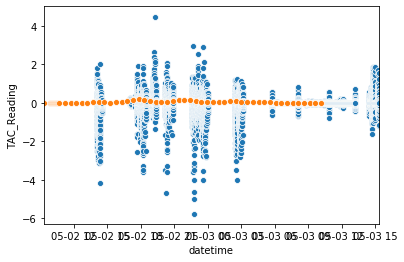

In [132]:
ax1 = sns.scatterplot(y='x', x = 'datetime', data=df_0297)
ax2 = sns.scatterplot(x='datetime', y='TAC_Reading', data=df_tacs_0297, ax=ax1)
plt.xlim(min(df_0297['datetime'].min(), df_tacs_0297['datetime'].min()), max(df_0297['datetime'].max(), df_tacs_0297['datetime'].max()))
ax1

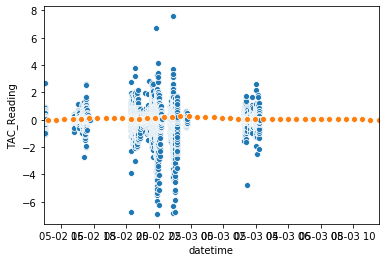

In [133]:
df1 = df[df.pid == 'MJ8002']
df2 = df_tacs[df_tacs.pid == 'MJ8002']
ax1 = sns.scatterplot(y='x', x = 'datetime', data=df1)
ax2 = sns.scatterplot(x='datetime', y='TAC_Reading', data=df2, ax=ax1)
plt.xlim(min(df1['datetime'].min(), df1['datetime'].min()), max(df2['datetime'].max(), df2['datetime'].max()))
ax1

In [69]:
df = df_final

In [70]:
drunk = df[df.drunk == 1]
sober = df[df.drunk == 0]
print('Mean sober variance is {}'.format(sober['var'].mean()))
print('Mean drunk variance is {}'.format(drunk['var'].mean()))

Mean sober variance is 5828684.665781233
Mean drunk variance is 2133993.0071759773


Text(0.5, 1.0, 'Sober Walk')

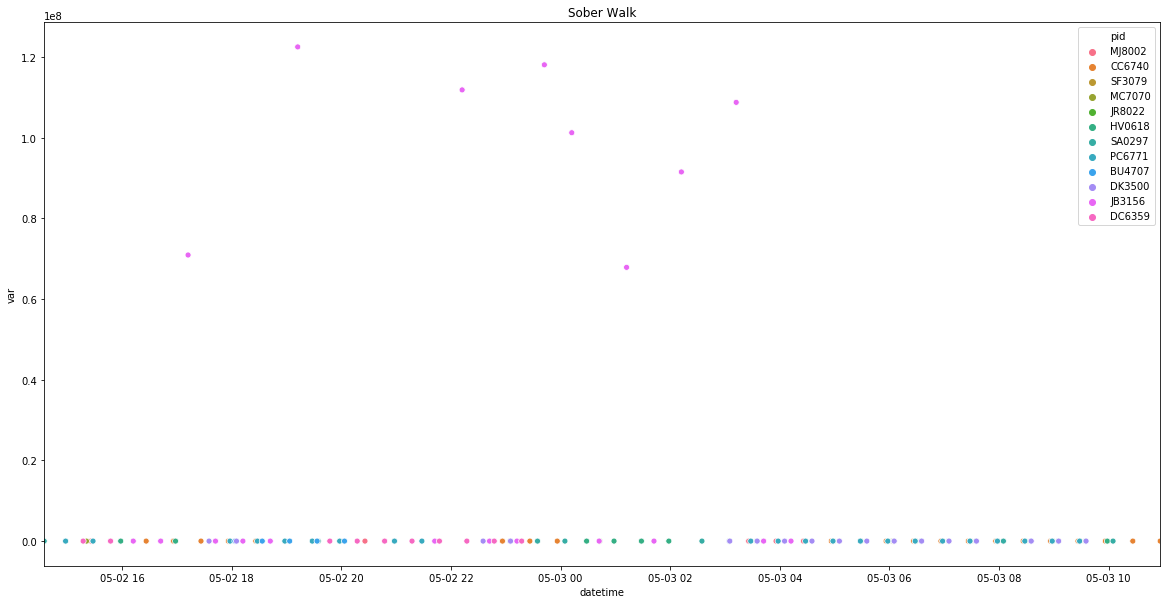

In [75]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('datetime', 'var', hue='pid', data=sober).set_title('Sober Walk')
plt.xlim(sober['datetime'].min(), sober['datetime'].max())
ax1

Text(0.5, 1.0, 'Drunk Walk')

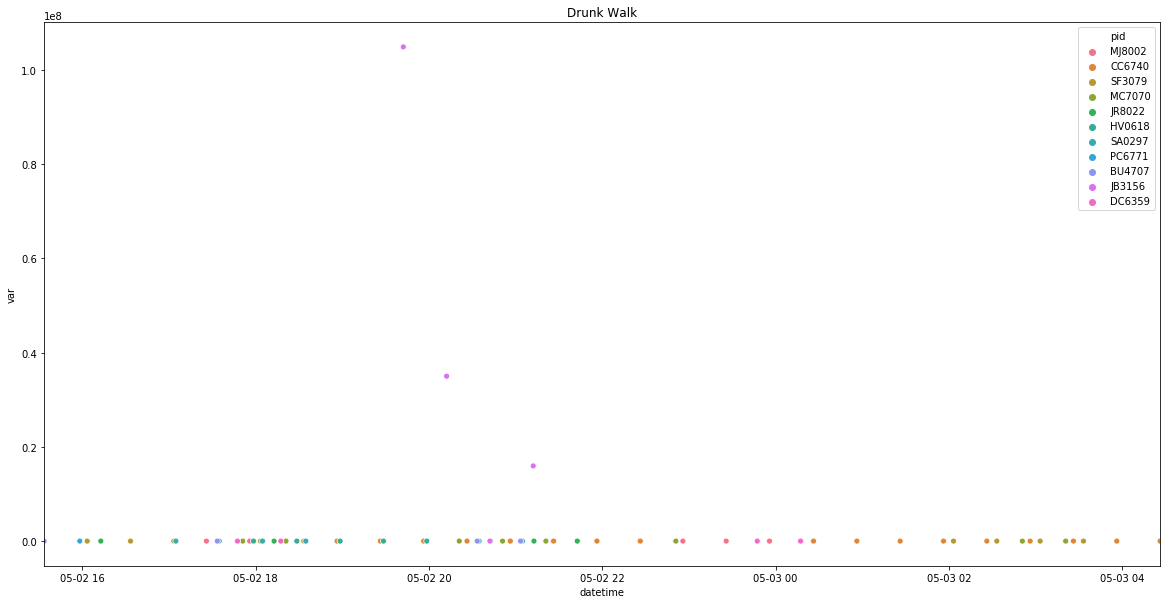

In [76]:
plt.figure(figsize=(20,10))
ax2 = sns.scatterplot('datetime', 'var', hue='pid', data=drunk).set_title('Drunk Walk')
plt.xlim(drunk['datetime'].min(), drunk['datetime'].max())
ax2

In [77]:
df_exclude = df[df.pid != 'JB3156']
drunk2 = df_exclude[df_exclude.drunk == 1]
sober2 = df_exclude[df_exclude.drunk == 0]

Text(0.5, 1.0, 'Sober Walk')

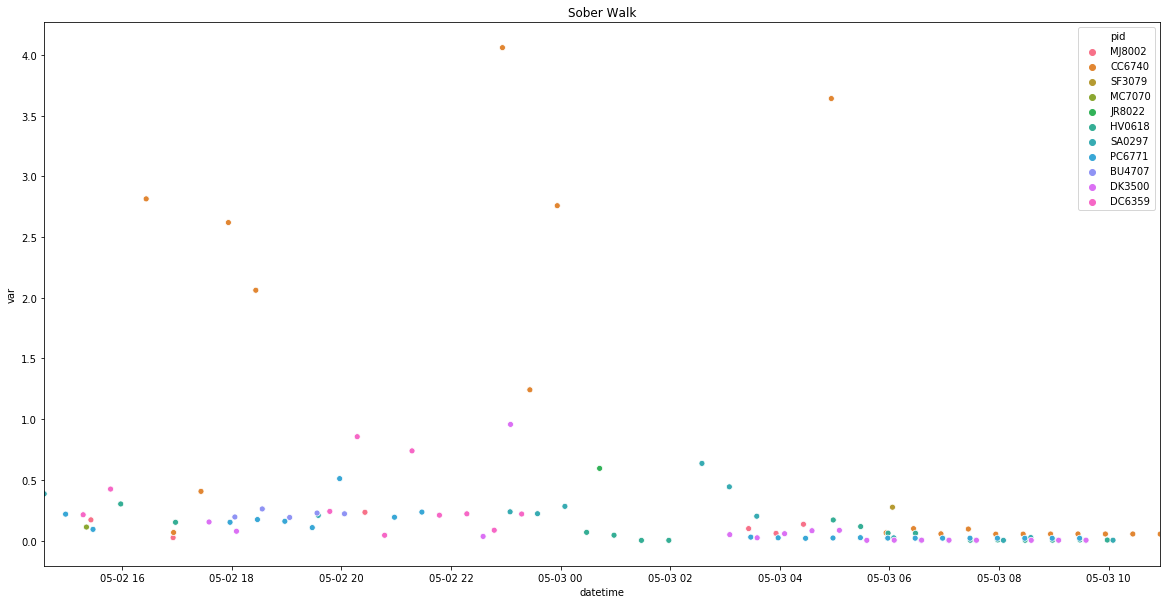

In [78]:
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('datetime', 'var', hue='pid', data=sober2).set_title('Sober Walk')
plt.xlim(sober2['datetime'].min(), sober2['datetime'].max())
ax1

Text(0.5, 1.0, 'Drunk Walk')

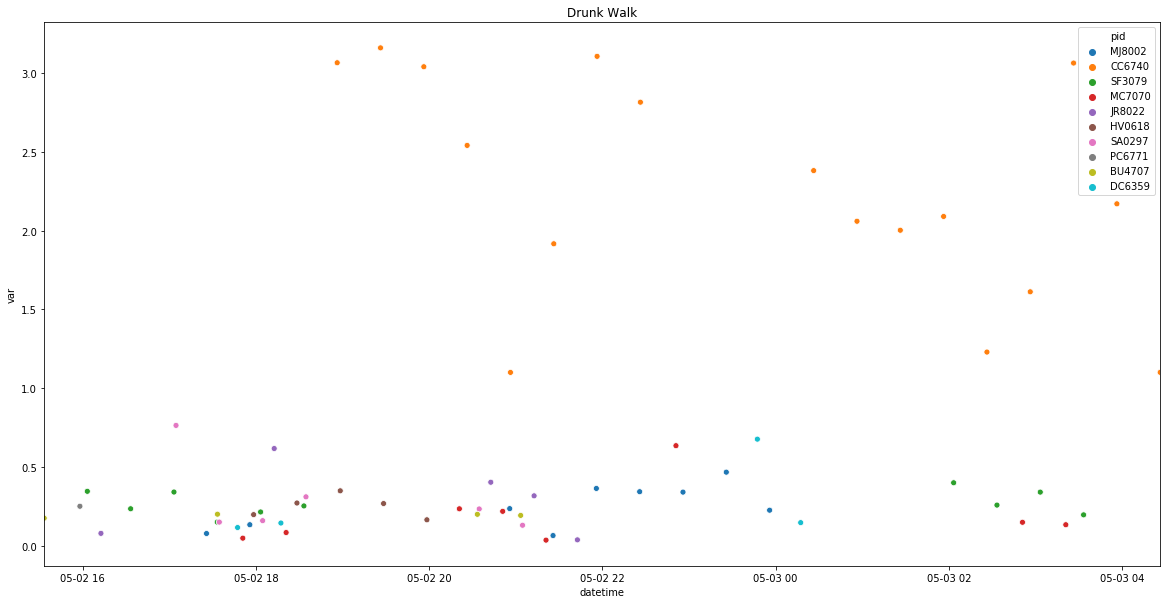

In [80]:
plt.figure(figsize=(20, 10))
ax2 = sns.scatterplot('datetime', 'var', hue='pid', data=drunk2).set_title('Drunk Walk')
plt.xlim(drunk2['datetime'].min(), drunk2['datetime'].max())
ax2

Text(0.5, 1.0, 'Participant SA0297')

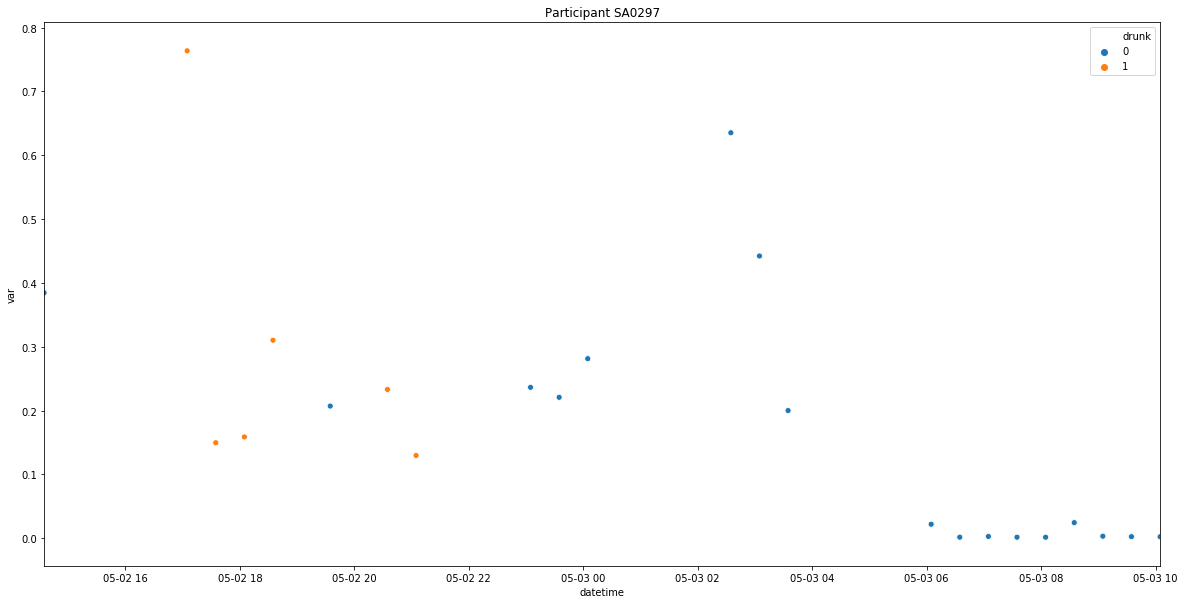

In [82]:
df_sa = df[df.pid == 'SA0297']
plt.figure(figsize=(20, 10))
ax1 = sns.scatterplot('datetime', 'var', hue='drunk', data=df_sa).set_title('Participant SA0297')
plt.xlim(df_sa['datetime'].min(), df_sa['datetime'].max())
ax1

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split


target_names = ['drunk']
feature_names = ['x_variance', 'y_variance', 'z_variance']
Xy = df[target_names + feature_names]
Xy = Xy.dropna()
X = Xy[feature_names]
y = Xy[target_names]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.6349206349206349


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [38]:
#try to train model with pid
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance']
Xy = df[target + feature + dummy]
df_dum = pd.get_dummies(Xy, columns=dummy, drop_first=True)
features = [c for c in df_dum.columns if c not in target]
X_train, X_test, y_train, y_test = train_test_split(df_dum[features], df_dum[target], test_size=0.3, random_state=42)

logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.6349206349206349


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
#retry with splitting on time
target_names = ['drunk']
feature_names = ['x_variance', 'y_variance', 'z_variance']
Xy = df[target_names + feature_names]
Xy = Xy.dropna()
X = Xy[feature_names]
y = Xy[target_names]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.5873015873015873


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [40]:
#try to train model with pid
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance']
Xy = df[target + feature + dummy]
df_dum = pd.get_dummies(Xy, columns=dummy, drop_first=True)
features = [c for c in df_dum.columns if c not in target]
X = df_dum[features]
y = df_dum[target]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.5238095238095238


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [41]:
Xy.describe(include='all')

,drunk,x_variance,y_variance,z_variance,pid
count,209.000000,209.000000,2.090000e+02,2.090000e+02,209
unique,NaN,NaN,NaN,NaN,12
top,NaN,NaN,NaN,NaN,CC6740
freq,NaN,NaN,NaN,NaN,37
mean,0.349282,0.520501,3.208988e+06,3.208988e+06,NaN
std,0.477888,0.934612,1.468490e+07,1.468490e+07,NaN
min,0.000000,0.000505,4.638478e-04,7.141577e-04,NaN
25%,0.000000,0.028087,2.703671e-02,3.718365e-02,NaN
50%,0.000000,0.109179,1.096915e-01,1.210786e-01,NaN
75%,1.000000,0.377389,4.423351e-01,3.455311e-01,NaN


In [42]:
from sklearn.metrics import accuracy_score
y_pred = logreg.predict(X_test)
accuracy_score(y_test, y_pred)

0.5238095238095238

In [60]:
#random forest with grid search
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [90, 100, 110, 120],
    'max_features': [1, 2, 3, 4],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [6, 8, 10],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    4.0s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   18.9s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   46.4s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.8min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.5min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  5.2min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 90,
 'max_features': 1,
 'min_samples_leaf': 3,
 'min_samples_split': 6,
 'n_estimators': 100}

In [44]:
grid_search.best_score_

0.8571428571428571

In [45]:
from joblib import parallel_backend
with parallel_backend('threading', n_jobs=2):
    param_grid = {
    'bootstrap': [True],
    'max_depth': [90, 100, 110],
    'max_features': [2, 3, 4],
    'min_samples_leaf': [5, 6, 7],
    'min_samples_split': [4, 6, 8],
    'n_estimators': [200, 300, 400, 500]
    }
    # Create a based model
    rf = RandomForestClassifier()
    # Instantiate the grid search model
    grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                              cv = 3, n_jobs = -1, verbose = 2)
    grid_search.fit(X_train, y_train)
    grid_search.best_params_

Fitting 3 folds for each of 324 candidates, totalling 972 fits
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400 
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400 
[CV] bootstrap=True, max_depth=90, max_features=2, min_sa

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 12 concurrent workers.
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklea

[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y wa

[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   8.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 [CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   8.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   8.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  15.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  16.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  19.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  20.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   21.7s


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  15.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  16.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  11.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  18.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  19.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  12.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   7.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  11.0s[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 

[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  17.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  11.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  20.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  11.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   7.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.8s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   7.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   9.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  12.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  12.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   7.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   7.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   7.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  18.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  17.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  19.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   7.9s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  11.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   8.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  15.8s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  18.4s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  12.0s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  18.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.5s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   7.1s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   7.6s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  16.2s
[CV] bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  17.7s[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  18.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 

[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  19.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.8s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   8.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  15.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  17.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  15.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  17.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  13.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   5.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   8.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  16.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  19.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  20.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  12.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  12.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   7.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   7.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  14.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  11.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  11.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  20.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:  2.5min
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  12.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  15.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  17.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  16.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.5s[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 

[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  11.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  19.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  19.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   8.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  15.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  15.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  19.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  20.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   7.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  16.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  17.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  18.9s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  16.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.8s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  13.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  13.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   8.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.1s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  18.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   5.2s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.6s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.5s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=   8.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=   8.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.5s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   9.2s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  15.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  15.4s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.5s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  10.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.2s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.8s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=   9.5s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  18.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  16.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  19.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   7.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  15.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 [CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.5s

[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   9.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  16.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  11.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.3s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  16.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.2s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  10.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  17.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  19.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  19.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  12.8s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   7.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  16.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  16.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   5.4s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  15.5s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=   9.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  17.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  18.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  17.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.0s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  16.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.8s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.8s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   7.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  16.4s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.8s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   7.7s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   7.5s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.4s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  15.9s
[CV] bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  11.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  14.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=   9.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  17.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.6s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 
[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  17.3s[CV]  bootstrap=True, max_depth=90, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 

[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.8s[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 

[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:  5.9min


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  16.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  12.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   8.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   8.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   9.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  14.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  16.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.9s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  13.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   8.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  13.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  16.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  18.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   5.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  14.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  15.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  15.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  11.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  11.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  12.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   7.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=   9.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  16.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  18.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  15.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.4s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  13.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   7.1s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  15.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  15.7s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  11.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   5.5s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   7.2s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.8s
[CV] bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  15.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.7s


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  18.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   9.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  14.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  12.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  12.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=   8.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=   9.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=   9.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  16.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  15.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  12.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=   9.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  16.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  15.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  12.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  12.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  16.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  15.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  12.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.0s
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  16.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  16.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  12.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  16.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  11.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  16.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  19.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.5s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   7.3s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=   9.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 [CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  13.1s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.0s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   7.8s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   8.6s
[CV] bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  15.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  11.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  11.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  13.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  13.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   9.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  12.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  17.5s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   5.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=   9.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  15.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  15.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  16.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  16.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  15.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  16.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  18.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  18.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  12.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  16.5s[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 

[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  18.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.0s[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 

[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  15.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  15.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   8.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  15.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  12.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  14.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  16.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  20.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  19.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.1s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed: 10.6min


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  16.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  11.5s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  12.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.3s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.2s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.5s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.4s
[CV] bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  15.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=   9.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=   9.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=   9.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  11.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  11.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  15.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 
[CV]  bootstrap=True, max_depth=100, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  12.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   7.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  15.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  16.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  19.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  14.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  16.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  15.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  13.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  15.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  11.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  18.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  17.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  19.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   7.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  14.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  16.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   7.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  15.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  15.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  16.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=   9.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  18.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  11.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   5.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.1s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  15.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  16.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  11.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   7.7s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=   9.4s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  17.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  16.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  16.9s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.6s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  13.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   7.3s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  13.8s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   8.2s
[CV] bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   6.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   8.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  15.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=2, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  11.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   7.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  15.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  15.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.1s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  18.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  19.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  11.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   8.7s
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   8.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  10.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  17.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  19.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  13.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  14.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  16.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  16.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  16.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  17.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   8.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  11.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  16.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  18.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  18.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  12.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  14.7s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  16.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  19.1s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  12.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  15.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  16.0s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  15.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  15.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  11.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  19.2s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   5.3s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.9s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.4s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.9s[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.8s
[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 

[CV] bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.1s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.8s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  18.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  18.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  12.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   7.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   8.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=200, total=   8.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=  14.5s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  16.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  15.8s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  12.5s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=3, min_samples_leaf=7, min_samples_split=8, n_estimators=500, total=  17.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  12.9s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=300, total=  12.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  13.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 [CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500 



C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  17.9s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  10.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=300, total=  11.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=4, n_estimators=500, total=  20.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  13.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   7.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=200, total=   7.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=400, total=  15.1s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  16.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  17.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  11.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  11.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=6, n_estimators=500, total=  18.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   5.9s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=400, total=  13.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.8s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=  10.5s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=300, total=   9.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  16.8s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  18.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500, total=  19.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  11.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.8s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=200, total=   7.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  15.8s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  15.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  10.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=4, n_estimators=500, total=  16.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=300, total=  11.1s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   5.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  13.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.5s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=   9.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  17.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  17.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=6, n_estimators=500, total=  17.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  13.4s
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=200, total=   6.5s[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400 

[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  11.9s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=400, total=  14.1s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.2s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=   9.9s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=300, total=  10.1s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  17.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=6, min_samples_split=8, n_estimators=500, total=  18.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.1s[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=200, total=   6.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400 

[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  14.6s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=400, total=  15.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  16.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  15.5s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=4, n_estimators=500, total=  18.5s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  10.8s

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)



[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=300, total=  11.0s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   5.5s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   5.8s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=200, total=   6.4s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  12.7s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.3s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=400, total=  14.5s
[CV] bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=500 


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:515: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)


[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.2s
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=  10.1s
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=300, total=   9.9s
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.9s
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  15.8s
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=6, n_estimators=500, total=  16.7s
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=   9.6s
[CV]  bootstrap=True, max_depth=110, max_features=4, min_samples_leaf=7, min_samples_split=8, n_estimators=400, total=

[Parallel(n_jobs=-1)]: Done 972 out of 972 | elapsed: 16.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


In [46]:
grid_search.best_score_

0.8253968253968255

In [47]:
grid_search.best_params_

{'bootstrap': True,
 'max_depth': 90,
 'max_features': 2,
 'min_samples_leaf': 5,
 'min_samples_split': 4,
 'n_estimators': 200}

In [48]:
from sklearn import svm
clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8253968253968254


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [52]:
y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.8253968253968254

In [53]:
#try with other data
random.seed(13)
df_rand_2 = pd.read_csv(file, skiprows=lambda i: i>0 and random.random() > p, low_memory=False)
df_rand_2.head()

,time,pid,x,y,z
0,1493733906952,SA0297,0.0001,-0.0021,-0.0046
1,1493733932252,SA0297,0.0000,-0.0004,-0.0027
2,1493734050012,SA0297,0.0786,0.0079,-0.1992
3,1493734190884,SA0297,-0.3458,-0.1889,0.1534
4,1493734195271,SA0297,-0.0247,0.0095,-0.1716


In [54]:
df_rand_2['datetime'] = pd.to_datetime(df_rand.time, unit='ms')
df_rand_2.head()

,time,pid,x,y,z,datetime
0,1493733906952,SA0297,0.0001,-0.0021,-0.0046,2017-05-02 14:04:47.972
1,1493733932252,SA0297,0.0000,-0.0004,-0.0027,2017-05-02 14:05:00.165
2,1493734050012,SA0297,0.0786,0.0079,-0.1992,2017-05-02 14:06:37.784
3,1493734190884,SA0297,-0.3458,-0.1889,0.1534,2017-05-02 14:06:55.555
4,1493734195271,SA0297,-0.0247,0.0095,-0.1716,2017-05-02 14:07:50.052


In [55]:
df_2 = participant_compiler(df_tacs, df_rand_2)

In [56]:
df_2.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 15:26:51.617,0.058096,0.089878,0.150345,2017-05-02 15:26:51.617,-0.001359,MJ8002,0,0.184545
2017-05-02 16:56:51.617,0.000965,0.001282,0.001078,2017-05-02 16:56:51.617,0.066343,MJ8002,0,0.001933
2017-05-02 17:26:51.617,0.027083,0.056787,0.037552,2017-05-02 17:26:51.617,0.101030,MJ8002,1,0.073270
2017-05-02 17:56:51.617,0.036796,0.010380,0.038039,2017-05-02 17:56:51.617,0.125199,MJ8002,1,0.053932
2017-05-02 20:26:51.617,0.131131,0.044568,0.041020,2017-05-02 20:26:51.617,0.059885,MJ8002,0,0.144445


In [57]:
target_names = ['drunk']
feature_names = ['x_variance', 'y_variance', 'z_variance']
Xy = df_2[target_names + feature_names]
Xy = Xy.dropna()
X = Xy[feature_names]
y = Xy[target_names]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.5


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [58]:
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance']
Xy = df_2[target + feature + dummy]
df_dum = pd.get_dummies(Xy, columns=dummy, drop_first=True)
features = [c for c in df_dum.columns if c not in target]
df_dum = df_dum.dropna()
X = df_dum[features]
y = df_dum[target_names]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.3548387096774194


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [59]:
clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.8225806451612904


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [146]:
df_triple = triple_participant_compiler(df_tacs, df)
df_triple.head()

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
2017-05-02 16:55:49.591,0.026063,0.026075,0.042161,2017-05-02 16:55:49.591,0.032789,MJ8002,0,0.056006
2017-05-02 17:05:49.591,0.026063,0.026075,0.042161,2017-05-02 17:05:49.591,0.032789,MJ8002,0,0.056006
2017-05-02 17:15:49.591,0.026063,0.026075,0.042161,2017-05-02 17:15:49.591,0.032789,MJ8002,0,0.056006
2017-05-02 17:25:49.591,0.100100,0.112273,0.108439,2017-05-02 17:25:49.591,0.066343,MJ8002,0,0.185430
2017-05-02 17:35:49.591,0.100100,0.112273,0.108439,2017-05-02 17:35:49.591,0.066343,MJ8002,0,0.185430


In [147]:
df_triple.describe(include='all')

,x_variance,y_variance,z_variance,datetime,TAC_Reading,pid,drunk,var
count,534.000000,5.340000e+02,5.340000e+02,534,534.000000,534,534.000000,5.340000e+02
unique,NaN,NaN,NaN,534,NaN,12,NaN,NaN
top,NaN,NaN,NaN,2017-05-03 04:06:20.198000,NaN,CC6740,NaN,NaN
freq,NaN,NaN,NaN,1,NaN,105,NaN,NaN
first,NaN,NaN,NaN,2017-05-02 14:58:08.409000,NaN,NaN,NaN,NaN
last,NaN,NaN,NaN,2017-05-03 11:16:20.198000,NaN,NaN,NaN,NaN
mean,0.507768,9.635444e+05,9.635447e+05,NaN,0.068019,NaN,0.314607,1.362658e+06
std,0.955636,9.048016e+06,9.048015e+06,NaN,0.060354,NaN,0.464794,1.279583e+07
min,0.000504,0.000000e+00,6.855082e-04,NaN,-0.004768,NaN,0.000000,1.345159e-03
25%,0.019487,1.579437e-02,2.380544e-02,NaN,0.016433,NaN,0.000000,3.814873e-02


In [148]:
target_names = ['drunk']
feature_names = ['x_variance', 'y_variance', 'z_variance']
Xy = df_triple[target_names + feature_names]
Xy = Xy.dropna()
X = Xy[feature_names]
y = Xy[target_names]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.6149068322981367


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [149]:
logreg.score(X_train, y_train)

0.6353887399463807

In [166]:
#try to train model with pid
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance']
Xy = df_triple[target + feature + dummy]
df_dum = pd.get_dummies(Xy, columns=dummy, drop_first=True)
features = [c for c in df_dum.columns if c not in target]
X = df_dum[features]
y = df_dum[target]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
print(logreg.score(X_test, y_test))

0.12422360248447205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [167]:
logreg.score(X_train, y_train)

0.7908847184986595

In [173]:
param_grid = {
    'bootstrap': [True, False],
    'max_depth': [100, 110, 120],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [10, 11, 12, 13],
    'min_samples_split': [4, 6, 8, 10],
    'n_estimators': [10, 25, 50, 100]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    0.2s
[Parallel(n_jobs=-1)]: Done 252 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 658 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 1224 tasks      | elapsed:   13.9s
[Parallel(n_jobs=-1)]: Done 1954 tasks      | elapsed:   21.9s
[Parallel(n_jobs=-1)]: Done 2844 tasks      | elapsed:   30.1s
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:   35.8s finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': True,
 'max_depth': 110,
 'max_features': 1,
 'min_samples_leaf': 12,
 'min_samples_split': 8,
 'n_estimators': 25}

In [174]:
grid_search.best_score_

0.7237634408602149

In [175]:
target_names = ['drunk']
feature_names = ['x_variance', 'y_variance', 'z_variance']
Xy = df_triple[target_names + feature_names]
Xy = Xy.dropna()
X = Xy[feature_names]
y = Xy[target_names]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

param_grid = {
    'bootstrap': [True, False],
    'max_depth': [110, 120, 130, 140],
    'max_features': [1, 2, 3],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [6, 8, 10],
    'n_estimators': [100, 200, 300, 1000]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 2)
grid_search.fit(X_train, y_train)
grid_search.best_params_

Fitting 3 folds for each of 1152 candidates, totalling 3456 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 12 concurrent workers.
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:    1.3s
[Parallel(n_jobs=-1)]: Done 138 tasks      | elapsed:   12.6s
[Parallel(n_jobs=-1)]: Done 341 tasks      | elapsed:   32.5s
[Parallel(n_jobs=-1)]: Done 624 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 989 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 1434 tasks      | elapsed:  2.4min
[Parallel(n_jobs=-1)]: Done 1961 tasks      | elapsed:  3.2min
[Parallel(n_jobs=-1)]: Done 2568 tasks      | elapsed:  4.1min
[Parallel(n_jobs=-1)]: Done 3257 tasks      | elapsed:  5.0min
[Parallel(n_jobs=-1)]: Done 3456 out of 3456 | elapsed:  5.3min finished
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:739: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  self.best_estimator_.fit(X, y, **fit_params)


{'bootstrap': False,
 'max_depth': 110,
 'max_features': 3,
 'min_samples_leaf': 2,
 'min_samples_split': 10,
 'n_estimators': 200}

In [176]:
grid_search.best_score_

0.6273763440860215

In [162]:
clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.12422360248447205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [163]:
clf.score(X_train, y_train)

0.8471849865951743

In [164]:
#try to train model with pid
target = ['drunk']
dummy = ['pid']
feature = ['x_variance', 'y_variance', 'z_variance']
Xy = df_triple[target + feature + dummy]
df_dum = pd.get_dummies(Xy, columns=dummy, drop_first=True)
features = [c for c in df_dum.columns if c not in target]
X = df_dum[features]
y = df_dum[target]
X_train = X[:int(X.shape[0]*0.7)]
X_test = X[int(X.shape[0]*0.7):]
y_train = y[:int(X.shape[0]*0.7)]
y_test = y[int(X.shape[0]*0.7):]

clf = svm.SVC()
clf.fit(X_train, y_train)
print(clf.score(X_test, y_test))

0.12422360248447205


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [165]:
clf.score(X_train, y_train)

0.8471849865951743